# Case study



## Introduction

This case study aims an exploratory data analysis and construction of three KPIs using the data provided by Trivago. The data contains details about the user's visits to the site.  

This section starts with a detailed analysis of different columns in the data and tries to find out useful insights. Then will develop three KPIs and critically analyses them.


## Section 1

The goal of the first part of this task is Exploratory Analysis of the Data and will try to find out useful insights about the users. 

This dataset total contains 16 columns and 900000 rows, we will be analyzing each column, how it would relate to other columns which are useful for extracting data about the customers.

In [608]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [494]:
data = pd.read_csv("session_data.csv")

Started with observing a sample of data set, which is given below:

In [495]:
data.head()

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day
0,20180626,2.018060e+18,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N
1,20180518,2.018050e+18,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20180530,20180531
2,20180508,2.018050e+18,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N
3,20180507,2.018050e+18,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N
4,20180523,2.018050e+18,W24I0V5Z2L,IT,0,0,2,Italy,20,6,0,887,2100,100,20180609,20180610


In [496]:
data.shape

(900000, 16)

In [497]:
data.dtypes

ymd                   int64
session_id          float64
tracking_id          object
platform             object
is_app                int64
is_repeater           int64
traffic_type          int64
country_name         object
agent_id              int64
clickouts             int64
bookings              int64
session_duration      int64
entry_page            int64
total_ctp             int64
arrival_day          object
departure_day        object
dtype: object

Then examined the types of each column in the dataset. It is found out that, the columns 'tracking_id', 'platform', 'country_name', 'arrival_day' and 'departure_day' are categorical variables and all the other columns are numerical variables.

Since it is found that, the data doesn't contain any null values, we don't have to clean the null values. But an examination of Departure and Arrival Date shows there are some missing values, labeled as '\N', so we will have to deal with this. 



In [498]:
#data=data.drop(["session_id","tracking_id","platform"],axis=1)

In [499]:
data.isnull().sum()

ymd                 0
session_id          0
tracking_id         0
platform            0
is_app              0
is_repeater         0
traffic_type        0
country_name        0
agent_id            0
clickouts           0
bookings            0
session_duration    0
entry_page          0
total_ctp           0
arrival_day         0
departure_day       0
dtype: int64

Below is the table, which gives the  statistical detailes about the columns:

In [500]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ymd,900000.0,2.018056e+07,5.072988e+01,2.018050e+07,2.018052e+07,2.018053e+07,2.018062e+07,2.018063e+07
session_id,900000.0,2.018055e+18,4.997107e+12,2.018050e+18,2.018050e+18,2.018050e+18,2.018060e+18,2.018060e+18
is_app,900000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
is_repeater,900000.0,4.030433e-01,4.905096e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
traffic_type,900000.0,4.967280e+00,2.372086e+00,2.000000e+00,2.000000e+00,6.000000e+00,6.000000e+00,1.000000e+01
agent_id,900000.0,1.519800e+01,7.518300e+00,2.000000e+00,1.200000e+01,1.800000e+01,2.000000e+01,2.800000e+01
clickouts,900000.0,8.439811e-01,1.813060e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.600000e+01
bookings,900000.0,9.876667e-03,1.072029e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
session_duration,900000.0,3.923618e+02,9.894955e+02,0.000000e+00,1.200000e+01,6.500000e+01,2.870000e+02,8.333500e+04
entry_page,900000.0,2.117316e+03,3.979071e+01,2.100000e+03,2.106000e+03,2.113000e+03,2.116000e+03,2.502000e+03


The analysis of all the columns gives that:

1. 'is_app' has a minimum and maximum of 0, which means this column only contains the value of 0, which implies data doesn't contain information about the session through the app.

2. 'is_repeater' is a categorical column with 0 and 1. 0 indicates the False value for the repeater and 1 indicates the true value of the repeater.

3. 'bookings' columns 25,50 and 75% are 0 values, which implies most of the values are 0, which means no bookings.

4. session_duration column has a high range of values, from 0 to 83335.

In [501]:
#cat_cols = data.dtypes[data.dtypes==np.object].index.to_list()

In [502]:
#cat_cols

Now we will analysis of each column in Detail, then followed by how each column contributes to the number of bookings. In that way, we can understand what are the factors affecting the users in the booking.

In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ymd               900000 non-null  int64  
 1   session_id        900000 non-null  float64
 2   tracking_id       900000 non-null  object 
 3   platform          900000 non-null  object 
 4   is_app            900000 non-null  int64  
 5   is_repeater       900000 non-null  int64  
 6   traffic_type      900000 non-null  int64  
 7   country_name      900000 non-null  object 
 8   agent_id          900000 non-null  int64  
 9   clickouts         900000 non-null  int64  
 10  bookings          900000 non-null  int64  
 11  session_duration  900000 non-null  int64  
 12  entry_page        900000 non-null  int64  
 13  total_ctp         900000 non-null  int64  
 14  arrival_day       900000 non-null  object 
 15  departure_day     900000 non-null  object 
dtypes: float64(1), int64

### Column 'ymd'

This column gives, date of the session. For analyzing easily I extracted year, month, and day of the week of the column added as an additional column in the data.

In [504]:
data["Date"] =  pd.to_datetime(data['ymd'], format='%Y%m%d',utc=False)

#data["Date"]=data["Date"].dt.date
# replace the original index with the new one
#data=data.set_index(datetime_index)

# we don't need the column anymore

data.drop('ymd',axis=1,inplace=True)


# IMPORTANT! we can only add rows for missing periods
# if the dataframe is SORTED by the index


In [505]:
data.head()

,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,Date
0,2.018060e+18,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N,2018-06-26
1,2.018050e+18,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20180530,20180531,2018-05-18
2,2.018050e+18,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N,2018-05-08
3,2.018050e+18,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N,2018-05-07
4,2.018050e+18,W24I0V5Z2L,IT,0,0,2,Italy,20,6,0,887,2100,100,20180609,20180610,2018-05-23


In [506]:
data['Date'].value_counts()

2018-05-01    18332
2018-05-02    17572
2018-05-03    16546
2018-05-07    16518
2018-06-25    16229
              ...  
2018-06-02    12837
2018-05-26    12799
2018-06-16    12588
2018-06-09    12583
2018-05-19    12507
Name: Date, Length: 61, dtype: int64

In [507]:
data['year'] = data['Date'].dt.year

Since the given data is a sample of data available in the Trivago, this data contains sessions from the year 2018 and the months of May and June.

In [508]:
data['year'].value_counts()

2018    900000
Name: year, dtype: int64

In [509]:
data['Month'] = data["Date"].dt.month_name()

In [510]:
data['Month'].value_counts()

May     465314
June    434686
Name: Month, dtype: int64

After inserting three new columns called, 'Date', 'year', 'Month', the sample of data looks like:

In [511]:
data.head()

,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,Date,year,Month
0,2.018060e+18,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N,2018-06-26,2018,June
1,2.018050e+18,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20180530,20180531,2018-05-18,2018,May
2,2.018050e+18,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N,2018-05-08,2018,May
3,2.018050e+18,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N,2018-05-07,2018,May
4,2.018050e+18,W24I0V5Z2L,IT,0,0,2,Italy,20,6,0,887,2100,100,20180609,20180610,2018-05-23,2018,May


Then plotted the count plot of the number of sessions in the month of May and June. Both have approximately the same amount of the number of sessions, with a slightly high number in the month of May. Below is the count plot of the Months:



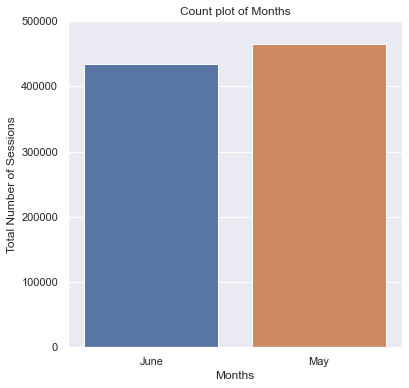

In [512]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
g = sns.countplot(x= "Month", data=data)
g.set_ylim(0,500000)
plt.xlabel('Months')
plt.ylabel('Total Number of Sessions')
plt.title("Count plot of Months");


In [514]:
data['Day'] = data["Date"].dt.day

In [515]:

data['day_of_week'] = data['Date'].dt.day_name()

In [516]:
data['day_of_week'].value_counts().sort_values()

Sunday       115589
Saturday     118149
Friday       124549
Monday       127336
Thursday     133918
Wednesday    138282
Tuesday      142177
Name: day_of_week, dtype: int64

Like Months, the number of sessions in each day of week also plotted, which is given below:

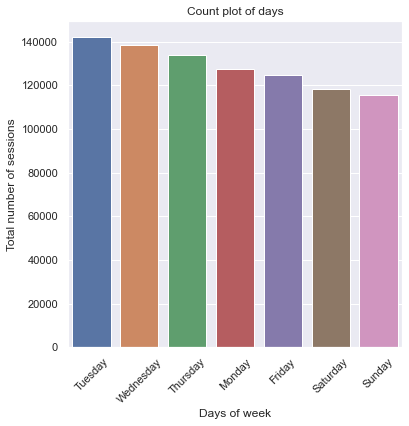

In [521]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
g = sns.countplot(x= "day_of_week", data=data,order=data["day_of_week"].value_counts().index)
#g.set_ylim(0,500000)
plt.xticks(rotation=45)
plt.xlabel('Days of week')
plt.ylabel('Total number of sessions')
plt.title("Count plot of days");

From the count plot of week days, working days(Monday to Friday) have the most number of sessions and weekends are the least. Of the week days, Tuesday and Wednesday have the most number of sections.

### Column 'Bookings'

Next, we will look into the column called 'bookings', which tells us whether the session resulted in a booking or not and how many bookings have been made. There are 8 values for this column, from 0 to 8, denoting the number of bookings with 0 means no bookings have been made. The table below shows the number of sessions contains for each number of bookings.

In [529]:
print(data["bookings"].value_counts(normalize=True).to_markdown())

|    |    bookings |
|---:|------------:|
|  0 | 0.99079     |
|  1 | 0.00866778  |
|  2 | 0.000457778 |
|  3 | 6e-05       |
|  4 | 1.55556e-05 |
|  5 | 4.44444e-06 |
|  6 | 3.33333e-06 |
|  8 | 1.11111e-06 |


The table above shows that most of the sessions resulted in no bookings. Around 99% of the sessions have no bookings. Only 1% of data have bookings and the proportion of the number of bookings higher than 2 is very much less.



In [524]:
#data["bookings"].value_counts().

Then examined the number of bookings made for each day of the week and the table contains the details about the number of bookings for each day is given below:

In [526]:
data_dayweek = data.groupby("day_of_week")["bookings"].sum()

print(data_dayweek.to_markdown())

| day_of_week   |   bookings |
|:--------------|-----------:|
| Friday        |       1240 |
| Monday        |       1252 |
| Saturday      |       1071 |
| Sunday        |       1166 |
| Thursday      |       1361 |
| Tuesday       |       1404 |
| Wednesday     |       1395 |


Also plotted a pie charge showing the proportion of bookings by days of the week.

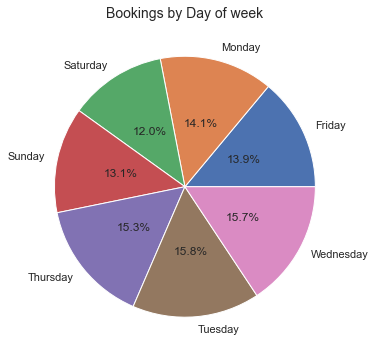

In [528]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data_dayweek.keys()
plt.pie(x=data_dayweek, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Bookings by Day of week", fontsize=14);
pie.savefig("DeliveryPieChart.png")

The pie chart shows that Thursday(15.3%), Tuesday(15.8%) and Wednesday(15.7%) have the most number of bookings and the weekend days, Sunday and Saturday have the least number of bookings. So the number of sessions each day has a direct effect on the number of bookings on the days.

Like the days, the count of bookings by each month also has analyzed and below is the pie chart.

In [527]:
data_month = data.groupby("Month")["bookings"].sum()

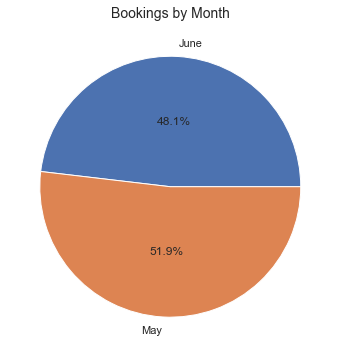

In [83]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data_month.keys()
plt.pie(x=data_month, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Bookings by Month", fontsize=14);
pie.savefig("DeliveryPieChart.png")

Like the days, the number of bookings for each month also depends on the number of sessions each month has. Since the month of May has a high number of sessions compared to June, it has a high number of bookings also.

For an easy analysis, I made two extra columns from the booking column, which gives the binary value for booked or not. So session with non-bookings labeled to 0 and all other numbers of bookings labeled as 1. Below is the proportion of bookings and non-bookings, So 99.1% of sessions are with zero bookings and only 0.99% sessions are with bookings. 

In [534]:
data['Booking'] = data['bookings'].apply(lambda x: 0 if x==0 else 1)

In [544]:
print(data['Booking'].value_counts(normalize=True).

|    |   Booking |
|---:|----------:|
|  0 |   0.99079 |
|  1 |   0.00921 |


In [545]:
data_bookings = data.groupby("Booking").count()


A pie chart shows the proportion of Bookings and non-bookings is given below:

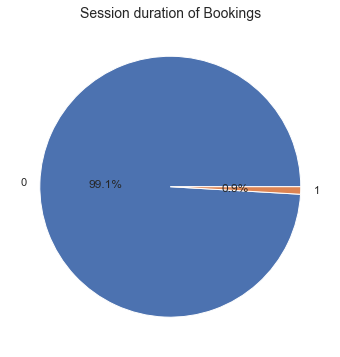

In [546]:

pie, ax = plt.subplots(figsize=[10,6])
labels = data_bookings.session_duration.keys()
plt.pie(x=data_bookings.session_duration, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Session duration of Bookings", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

In [549]:
data_bookings = data[data["bookings"]!=0]

In [551]:
print(data_bookings.bookings.value_counts(normalize=True).to_markdown())

|    |    bookings |
|---:|------------:|
|  1 | 0.941127    |
|  2 | 0.0497044   |
|  3 | 0.00651466  |
|  4 | 0.00168899  |
|  5 | 0.000482567 |
|  6 | 0.000361925 |
|  8 | 0.000120642 |


The above table shows the proportion of the number of bookings, in all the bookings made in the sessions. It is clear from the table that, around 94% of bookings are single bookings and the proportion of the higher number of bookings decreases drastically.

Now plotted the distribution of the number of bookings made in the sessions.

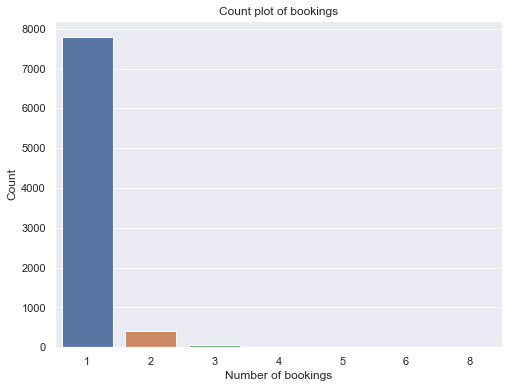

In [553]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
g = sns.countplot(x= "bookings", data=data_bookings)
#g.set_ylim(0,500)
plt.ylabel('Count')
plt.title("Count plot of bookings");
plt.xlabel("Number of bookings");


In [426]:
book=data_bookings.groupby("bookings").sum()

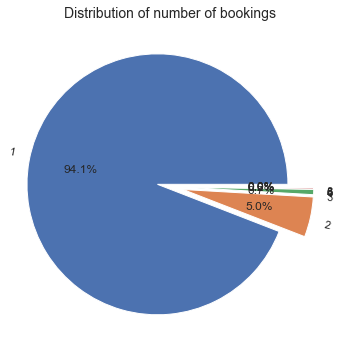

In [81]:
pie, ax = plt.subplots(figsize=[10,6])
labels = booking.keys()
plt.pie(x=booking, autopct="%.1f%%",explode=[0.1]*7,labels=labels,rotatelabels=True)
plt.title("Distribution of number of bookings", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

The large difference in the proportion of single booking and the higher number of bookings are visible in the distribution graphs.

### Column 'country_name'

This column named 'country_name' contains the name of countries from which the sessions are made. There are 257 countries included in this data. 

In [85]:
def unique_values(column):
    values = data[column].value_counts()
    print("Values of column {} is:".format(column))
    print(values)

Since there are 257 unique values in the country column, we cannot plot the count plot of all the values, so selected the countries which have the total number of sessions greater than 500 and plotted the count plot.

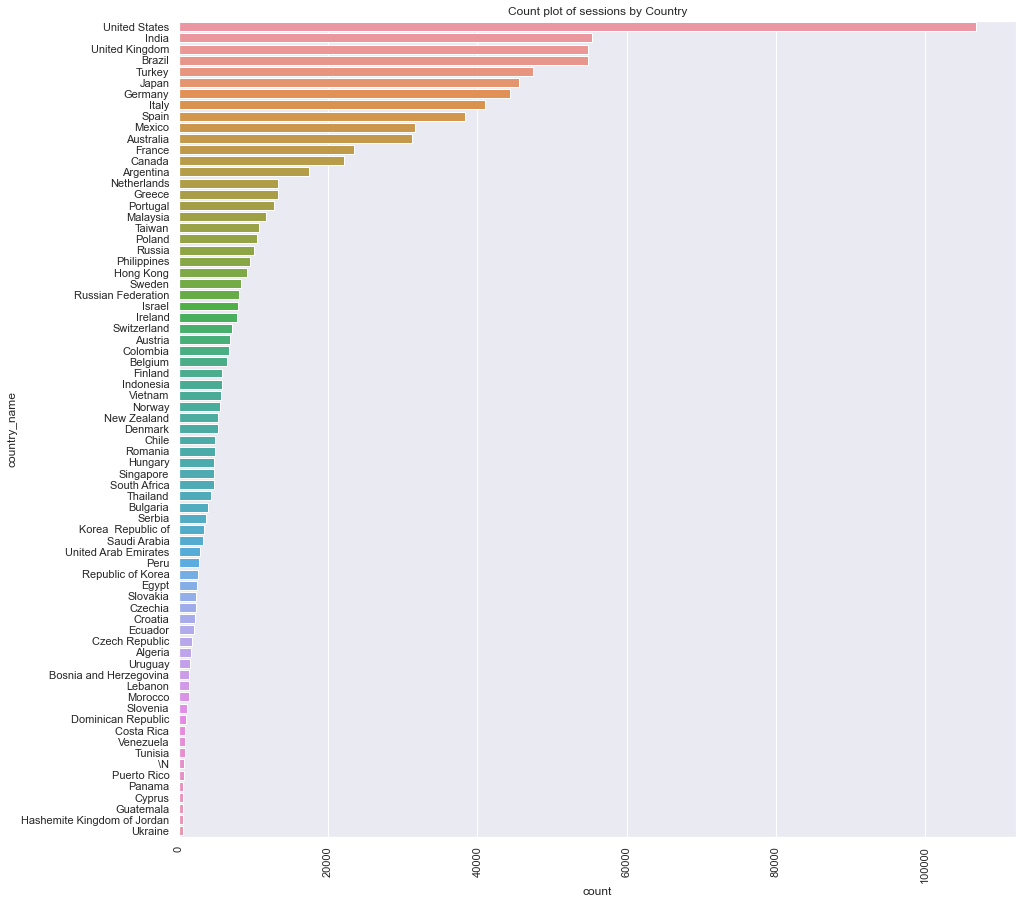

In [556]:
plt.figure(figsize=(15,15))
sns.set_theme(style="darkgrid")
g = sns.countplot(y= "country_name", data=data_country,order=data_country["country_name"].value_counts().index)
#g.set_ylim(0,100000)
plt.title("Count plot of sessions by Country")
#plt.ylabel("Countries")
plt.xticks(rotation=90);

From the count plot, it is explicit that the United States has the most number of sessions. The top ten countries which have the most number of sessions and the proportion of sessions are presented below:

In [566]:
print(data.country_name.value_counts(normalize=True)[:10].to_markdown())


|                |   country_name |
|:---------------|---------------:|
| United States  |      0.1187    |
| India          |      0.0615467 |
| United Kingdom |      0.0608522 |
| Brazil         |      0.0608489 |
| Turkey         |      0.0527989 |
| Japan          |      0.0507    |
| Germany        |      0.0492356 |
| Italy          |      0.04559   |
| Spain          |      0.04259   |
| Mexico         |      0.0350956 |


In [558]:
#data_country=data[data['country_name'].map(data['country_name'].value_counts()) >= 500]
#data_country["Booking"].value_counts()

In [574]:
#unique_values("is_app")

### Column 'is_repeater'

This column gives information about whether the session is from the user who previously visited the site before. We can comprehend from a careful examination of the column that more than 50% of sessions are new.

In [578]:
print(data.is_repeater.value_counts(normalize=True).to_markdown())

|    |   is_repeater |
|---:|--------------:|
|  0 |      0.596957 |
|  1 |      0.403043 |


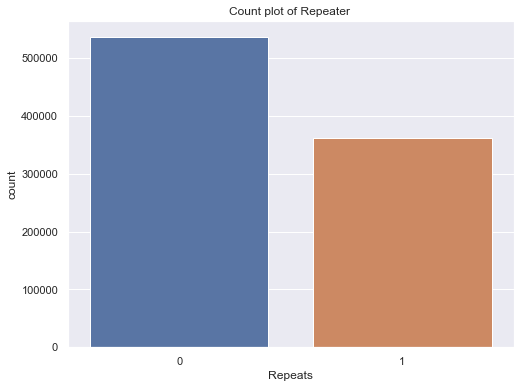

In [579]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
g = sns.countplot(x= "is_repeater", data=data)
#g.set_ylim(0,100000)
plt.title("Count plot of Repeater ");
plt.xlabel("Repeats");

Above is the distribution of sessions for repeater and non-repeater and there are more non-repeater sessions than repeater sessions.

Below is the barplot which shows the distribution of bookings for repeaters and non-repeaters. Bookings for the non-repeater session is high since it has a high number of sessions.

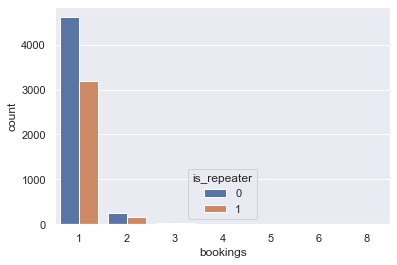

In [581]:
sns.countplot(x="bookings",hue="is_repeater",data=data_bookings);

In [592]:
repeater = data_bookings.groupby("is_repeater")["Booking"].sum()
repeater

is_repeater
0    4911
1    3378
Name: Booking, dtype: int64

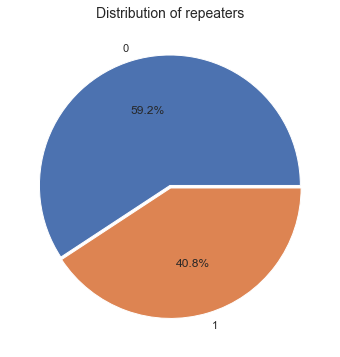

In [594]:

pie, ax = plt.subplots(figsize=[10,6])
labels = repeater.keys()
plt.pie(x=repeater, autopct="%.1f%%",explode=[0.01]*2,labels=labels)
plt.title("Distribution of repeaters", fontsize=14);

#pie.savefig("DeliveryPieChart.png")

Since the number of sessions is high for non-repeaters, the number of bookings also high for them. The non-repeater consist of 59.2% of bookings where as repeaters is 40.8%

In [595]:
book_no = data_bookings.groupby("bookings").sum()#["Booking"].sum()


### Column 'traffic_type'

This column contains coded categorization of the session marketing channel. There are 5 channels and the proportion of sessions for each channel is given below:

In [600]:
print(data.traffic_type.value_counts(normalize=True).to_markdown())

|    |   traffic_type |
|---:|---------------:|
|  6 |      0.331669  |
|  2 |      0.324367  |
|  8 |      0.222222  |
|  4 |      0.111111  |
| 10 |      0.0106311 |


Channel numbers 6 and 2 have a high number of sessions and channel 10 has the least. Below is the visualization of distribution.

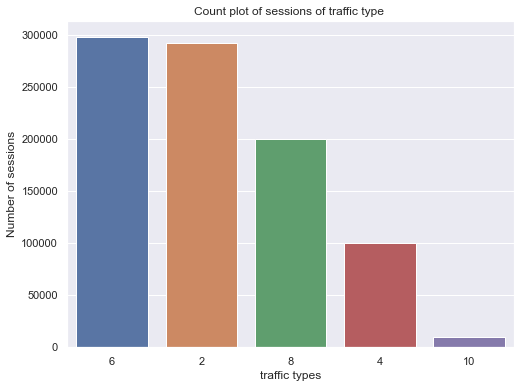

In [603]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
g = sns.countplot(x= "traffic_type", data=data, order=data["traffic_type"].value_counts().index)
#g.set_ylim(0,100000)
plt.title("Count plot of sessions of traffic type ");
plt.xlabel("traffic types")
plt.ylabel("Number of sessions");

### Column 'session_duration'

The session duration column gives information about the length of sessions in seconds. The minimum length 0 and maximum session duration is around 80000. The figure shows the distribution of session duration and it shows that most of the session has a duration of fewer than 5000 seconds. 

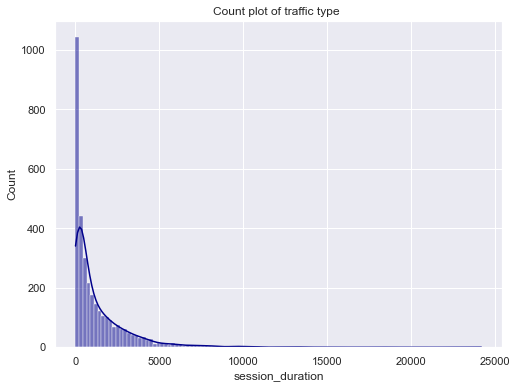

In [605]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
g = sns.histplot(x= "session_duration",data=data_country,kde=True,color = 'darkblue'
             
             )
#g.set_xlim(0,15000)
plt.title("Count plot of traffic type ");
plt.xlabel("session_duration");

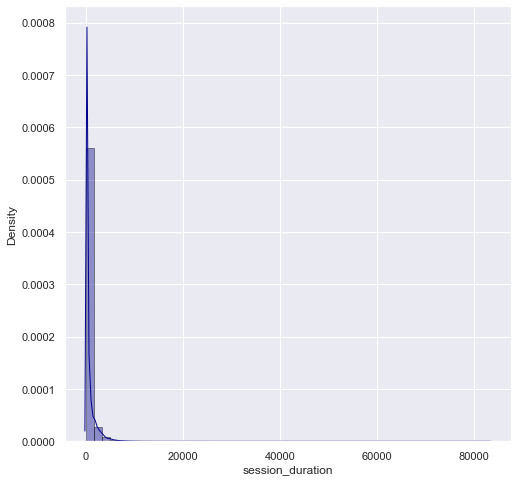

In [609]:
plt.figure(figsize=(8,8))
sns.distplot(data['session_duration'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1});

 The Density plot of session duration clearly shows most of the session didn't last for much time, average duration is around zero.

<Figure size 720x720 with 0 Axes>

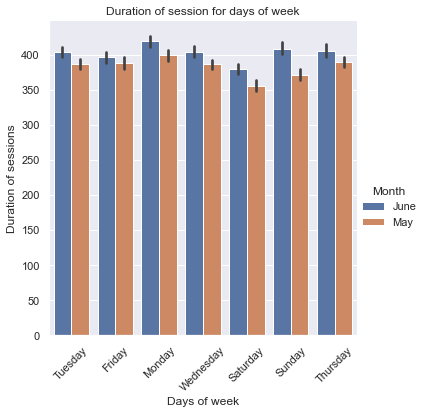

In [617]:
plt.figure(figsize=(10,10))

sns.catplot(x="day_of_week", y="session_duration", kind="bar",hue="Month",
            data=data)

plt.xlabel("Days of week")
plt.ylabel("Duration of sessions")
plt.xticks(rotation=45);
plt.title("Duration of session for days of week");
plt.show();

<Figure size 720x720 with 0 Axes>

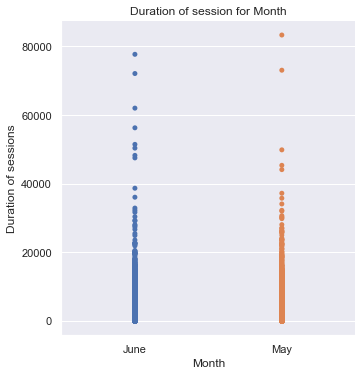

In [614]:
plt.figure(figsize=(10,10))
sns.catplot(x="Month", y="session_duration",jitter=False, 
            data=data);

plt.xlabel("Month")
plt.ylabel("Duration of sessions");
plt.title("Duration of session for Month");



The plots displayed below show how the session duration varies for the two months we have. Even though the number of sessions is high for the month of May, the total duration of sessions is high for the month of June. But like the number of sessions, duration also high for weekdays.

<Figure size 576x576 with 0 Axes>

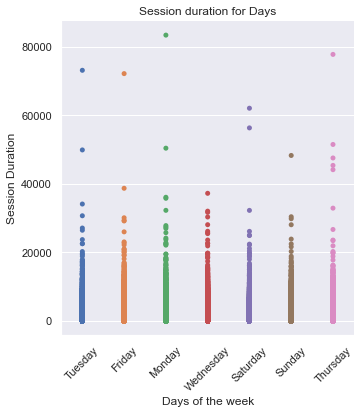

In [619]:

plt.figure(figsize=(8,8))
sns.catplot(x="day_of_week", y="session_duration",jitter=False, 
            data=data)
plt.xticks(rotation=45);
plt.xlabel('Days of the week')
plt.ylabel('Session Duration')
plt.title('Session duration for Days');

<Figure size 576x576 with 0 Axes>

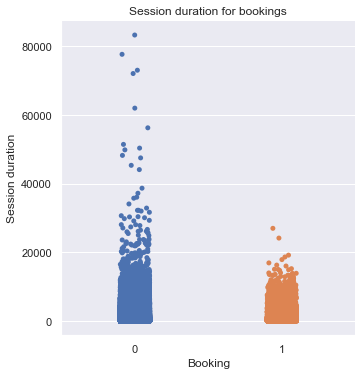

In [625]:
plt.figure(figsize=(8,8))
sns.catplot(x="Booking", y="session_duration",
            data=data)
plt.ylabel('Session duration')
plt.title('Session duration for bookings');

<Figure size 576x576 with 0 Axes>

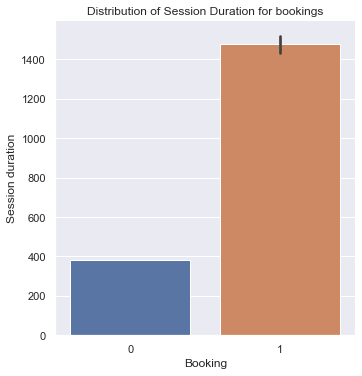

In [632]:
plt.figure(figsize=(8,8))
sns.catplot(x="Booking", y="session_duration",kind="bar",
            data=data)
plt.title('Distribution of Session Duration for bookings')
plt.ylabel('Session duration');

<Figure size 576x576 with 0 Axes>

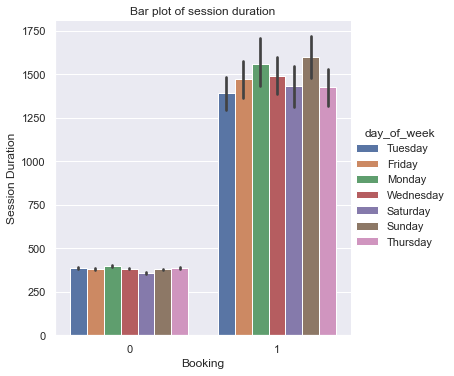

In [636]:
plt.figure(figsize=(8,8))
sns.catplot(x="Booking", y="session_duration",kind="bar",hue='day_of_week',
            data=data)
plt.ylabel('Session Duration')
plt.title('Bar plot of session duration');

<Figure size 576x576 with 0 Axes>

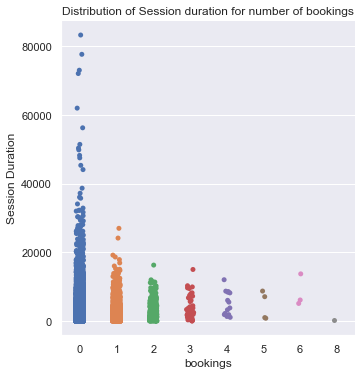

In [635]:
plt.figure(figsize=(8,8))
sns.catplot(x="bookings", y="session_duration",
            data=data)
plt.ylabel('Session Duration')
plt.title('Distribution of Session duration for number of bookings');


The distribution of session duration is widely spread for non-bookings sessions which means the longest session duration is for non booked sessions. But the sessions with bookings have the most session duration.

### Column Arrival Day and Departure day

The arrival date and departure dates are search dates for arrival and departure. Careful examination of these columns reveals that there are a lot of entries which doesn't have any arrival and departure date. I believe it is because all the searches don't necessarily give an arrival date and departure. For the purpose of analysis, I removed all the entries which don't have any arrival and departure date.

After that, I extracted Year, Date, and month from the arrival and departure dates. Using these dates I calculated the length of stay in days that appeared in the searches and analyses it also.

In [672]:
data["arrival_day"]=data["arrival_day"].replace("\\N"," ")

In [676]:
data_arr_dep=data[data["arrival_day"]!=" "]

In [680]:
#data_arr_dep["arrival_day"].value_counts()

In [681]:
#data_arr_dep["departure_day"].value_counts()

In [679]:
data_arr_dep["Arrival_Date"] =  pd.to_datetime(data_arr_dep.arrival_day, format='%Y%m%d')
data_arr_dep["Departure_Date"] =  pd.to_datetime(data_arr_dep.departure_day, format='%Y%m%d')



In [682]:
data_arr_dep["Arrival_Day"]=data_arr_dep["Arrival_Date"].dt.day_name()

In [683]:
data_arr_dep["length_stay"]=(data_arr_dep["Departure_Date"]-data_arr_dep["Arrival_Date"]).dt.days

In [685]:
#data_arr_dep.dtypes


In [688]:
data_arr_dep.length_stay.min()

0

In [689]:
data_arr_dep.length_stay.max()

91

Plotted the distribution of length of stay. The minimum and maximum length of stay are 0 and 91 respectively. The distribution plot given below shows that most of the length of stay is below 20 days.

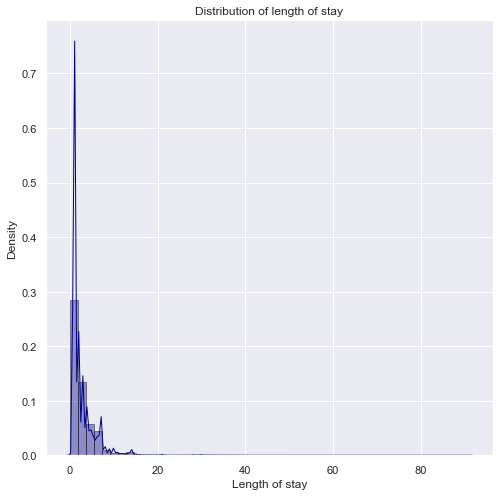

In [687]:
plt.figure(figsize=(8,8))
sns.distplot(data_arr_dep['length_stay'], hist=True, 
             
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

plt.xlabel('Length of stay')
plt.title('Distribution of length of stay');

In [690]:
#data_arr_dep["length_stay"].value_counts()

In [691]:
data_arr_dep["arr_month"] = data_arr_dep["Arrival_Date"].dt.month_name()

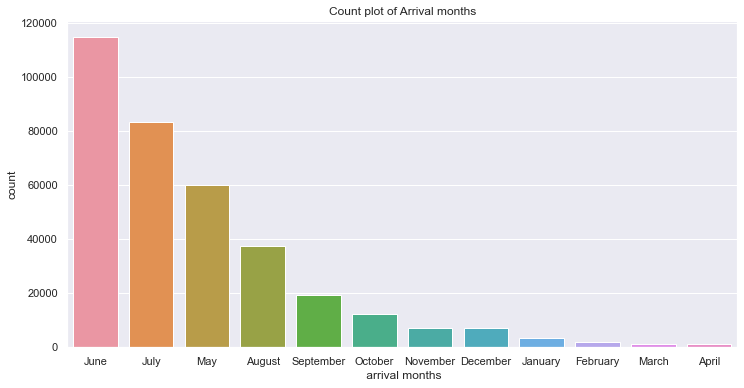

In [696]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
g = sns.countplot(x= "arr_month", data=data_arr_dep,order=data_arr_dep.arr_month.value_counts().index)
#g.set_ylim(0,50000)
plt.title("Count plot of Arrival months")
plt.xlabel(" arrival months");

The bookings are high for the arrival month of June, July, and May respectively. Since this data contains sessions from the month of July and may, most bookings are done for May, June, and July.

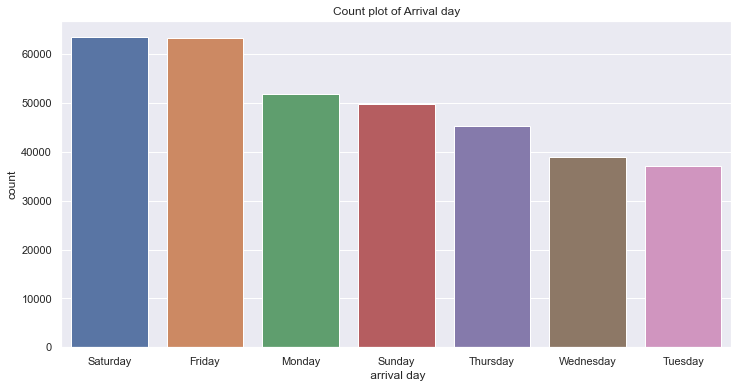

In [705]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
g = sns.countplot(x= "Arrival_Day", data=data_arr_dep,order=data_arr_dep.Arrival_Day.value_counts().index)
#g.set_ylim(0,50000)
plt.title("Count plot of Arrival day")
plt.xlabel(" arrival day");

In the case of Arrival day, the numbers are high for Saturday and Friday, so this trend can be due to the weekends.

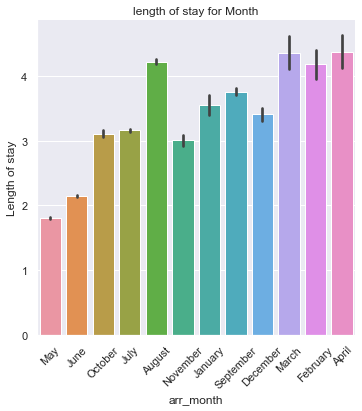

In [174]:
g=sns.catplot(x="arr_month",y="length_stay",data=data_arr_dep,kind='bar')

plt.ylabel('Length of stay')
plt.xlabel('Arrival Month')
plt.title('length of stay for arrival Month')
plt.xticks(rotation=45);

Length of stay is higher for the arrival months of February,March,April and August.

In [706]:
data_arr_month=data_arr_dep.groupby("arr_month")["Booking"].sum()

In [707]:
#data_arr_month

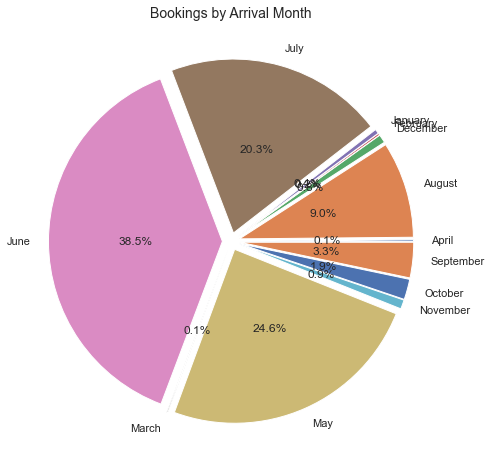

In [708]:
pie, ax = plt.subplots(figsize=[8,8])
labels = data_arr_month.keys()
plt.pie(x=data_arr_month, autopct="%.1f%%", explode=[0.05]*12,labels=labels, pctdistance=0.5)
plt.title("Bookings by Arrival Month", fontsize=14);


From the pie chart, above we can see that, bookings are more for arrival month of May, June, and July. This also due to the fact that the data contains sessions from May and June.

In [701]:
data_arr_day=data_arr_dep.groupby("Arrival_Day")["Booking"].sum()


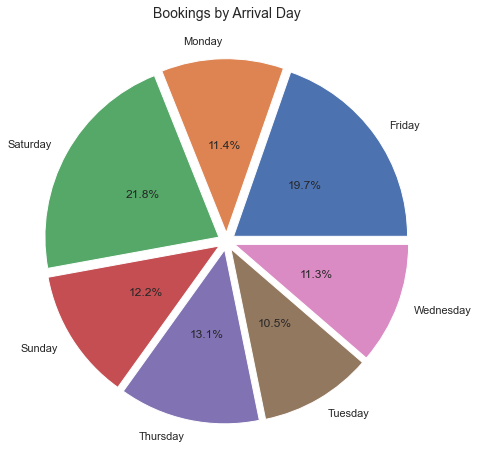

In [702]:
pie, ax = plt.subplots(figsize=[8,8])
labels = data_arr_day.keys()
plt.pie(x=data_arr_day, autopct="%.1f%%", explode=[0.05]*7,labels=labels, pctdistance=0.5)
plt.title("Bookings by Arrival Day", fontsize=14);

In the case of arrival day, more bookings are done for  Friday, Saturday, and Sunday. I believe these trends are due to the weekend holidays.

In [704]:
data_arr_dep["dep_month"] = data_arr_dep.Departure_Date.dt.month_name()
data_arr_dep["dep_day"] = data_arr_dep.Departure_Date.dt.day_name()

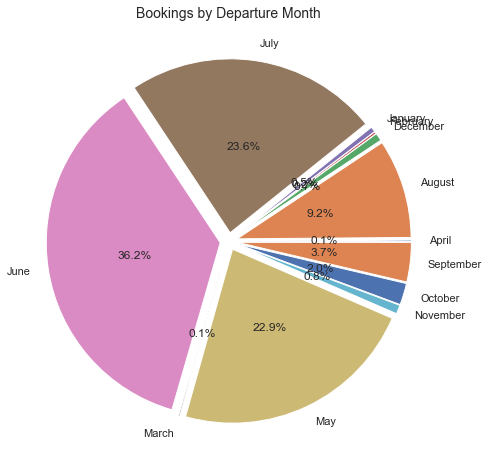

In [709]:
data_dep_month=data_arr_dep.groupby("dep_month")["Booking"].sum()
pie, ax = plt.subplots(figsize=[8,8])
labels = data_dep_month.keys()
plt.pie(x=data_dep_month, autopct="%.1f%%", explode=[0.05]*12,labels=labels, pctdistance=0.5)
plt.title("Bookings by Departure Month", fontsize=14);

Like Arrival day, most of the sessions are from the departure month of May, June, and July. This depends on the month of search we have.

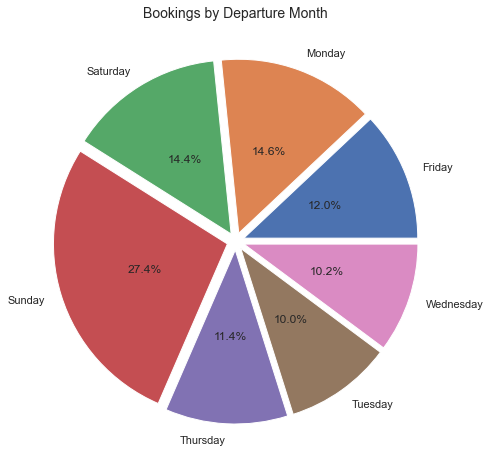

In [183]:
data_dep_day=data_arr_dep.groupby("dep_day")["Booking"].sum()
pie, ax = plt.subplots(figsize=[8,8])
labels = data_dep_day.keys()
plt.pie(x=data_dep_day, autopct="%.1f%%", explode=[0.05]*7,labels=labels, pctdistance=0.5)
plt.title("Bookings by Departure Month", fontsize=14);

Most users return on Sundays, because most of the bookings are for weekend holidays, and they return once the weekend is over.

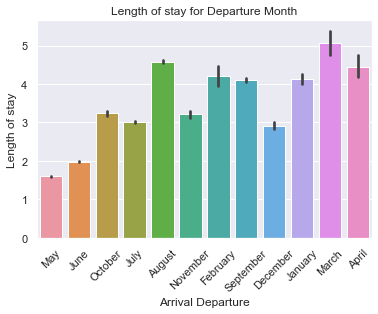

In [710]:
sns.barplot(x="dep_month",y="length_stay",data=data_arr_dep)
plt.xticks(rotation='45')
plt.ylabel("Length of stay")
plt.xlabel("Arrival Departure")
plt.title("Length of stay for Departure Month");

Like arrival months, the length of stay is high for departure months of March, April, and August.

## Section 2

### KPI

This section aims to develeop three KPIs for the performance of sessions on the site and shows their
development over time


### 1.New and returning Users Rate

The distinction between new and returning visitors is very helpful, as these two user groups often differ greatly in the website behavior, which can then be viewed separately. As a rule, returning visitors already have an increased interest in the product offered by the site.

Analyzing the behavior of new and returning visitors in more detail gains valuable new insights to improve performance. So with the help of remarketing, you can increase the number of returning visitors.

To calculate the rate, used the 'is_repeater' column, and divided into two new user named 'old_user' and 'new_user', which gives binary values denoting the truth values.

In [66]:
data.head()

,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,Date,year,Month,Day,day_of_week
0,2.018060e+18,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N,2018-06-26,2018,June,26,Tuesday
1,2.018050e+18,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20180530,20180531,2018-05-18,2018,May,18,Friday
2,2.018050e+18,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N,2018-05-08,2018,May,8,Tuesday
3,2.018050e+18,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N,2018-05-07,2018,May,7,Monday
4,2.018050e+18,W24I0V5Z2L,IT,0,0,2,Italy,20,6,0,887,2100,100,20180609,20180610,2018-05-23,2018,May,23,Wednesday


In [210]:
data['old_user']=pd.get_dummies(data["is_repeater"])[1]
data['new_user']=pd.get_dummies(data["is_repeater"])[0]

In [211]:
data


,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,Date,old_user,new_user
0,2.018060e+18,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N,2018-06-26,1,0
1,2.018050e+18,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20180530,20180531,2018-05-18,0,1
2,2.018050e+18,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N,2018-05-08,0,1
3,2.018050e+18,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N,2018-05-07,0,1
4,2.018050e+18,W24I0V5Z2L,IT,0,0,2,Italy,20,6,0,887,2100,100,20180609,20180610,2018-05-23,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,2.018060e+18,X3H6E73Q2Z,ID,0,0,8,Indonesia,20,0,0,32,2113,0,\N,\N,2018-06-30,0,1
899996,2.018050e+18,ODJ3C70BA9,DE,0,0,8,Germany,18,0,0,7,2116,0,\N,\N,2018-05-09,0,1
899997,2.018050e+18,N0RPBRBKN3,US,0,1,8,United States,2,1,0,42,2116,0,20180606,20180609,2018-05-19,1,0
899998,2.018050e+18,BF47FQ35KR,AU,0,0,8,Australia,18,0,0,3,2116,0,\N,\N,2018-05-06,0,1


In [247]:
new_user=data.groupby("Date").sum()

In [248]:
new_user

,session_id,is_app,is_repeater,traffic_type,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,old_user,new_user
Date,,,,,,,,,,,,
2018-05-01,3.699489e+22,0,7167,99354,291784,14651,181,6811509,38821572,110003,7167.0,11165.0
2018-05-02,3.546117e+22,0,7091,93310,266046,13678,169,6375392,37212542,103655,7091.0,10481.0
2018-05-03,3.339066e+22,0,6761,86830,247290,13425,158,6344345,35032923,107434,6761.0,9785.0
2018-05-04,3.117484e+22,0,6215,80334,234336,12227,152,5680693,32726406,86889,6215.0,9233.0
2018-05-05,2.958259e+22,0,5787,80204,239798,11060,127,5154696,31030919,78661,5787.0,8872.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-26,3.216182e+22,0,6236,75380,234926,13883,134,6368008,33748012,103894,6236.0,9701.0
2018-06-27,3.051912e+22,0,5970,72616,223214,13193,161,6153269,32025939,108463,5970.0,9153.0
2018-06-28,3.056957e+22,0,6081,71964,223398,13376,141,6128823,32075210,108755,6081.0,9067.0


Then grouped the data for each session date and calculated the count of new users and olde users for each date.
Estimated the propotion of user rate from total users. 

In [730]:
new_user

,session_id,is_app,is_repeater,traffic_type,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,old_user,new_user,rate,oldrate
Date,,,,,,,,,,,,,,
2018-05-01,3.699489e+22,0,7167,99354,291784,14651,181,6811509,38821572,110003,7167.0,11165.0,0.609044,0.390956
2018-05-02,3.546117e+22,0,7091,93310,266046,13678,169,6375392,37212542,103655,7091.0,10481.0,0.596460,0.403540
2018-05-03,3.339066e+22,0,6761,86830,247290,13425,158,6344345,35032923,107434,6761.0,9785.0,0.591382,0.408618
2018-05-04,3.117484e+22,0,6215,80334,234336,12227,152,5680693,32726406,86889,6215.0,9233.0,0.597683,0.402317
2018-05-05,2.958259e+22,0,5787,80204,239798,11060,127,5154696,31030919,78661,5787.0,8872.0,0.605225,0.394775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-26,3.216182e+22,0,6236,75380,234926,13883,134,6368008,33748012,103894,6236.0,9701.0,0.608709,0.391291
2018-06-27,3.051912e+22,0,5970,72616,223214,13193,161,6153269,32025939,108463,5970.0,9153.0,0.605237,0.394763
2018-06-28,3.056957e+22,0,6081,71964,223398,13376,141,6128823,32075210,108755,6081.0,9067.0,0.598561,0.401439


Visualized the trends in the rate of new users for all the dates.

<Figure size 360x1080 with 0 Axes>

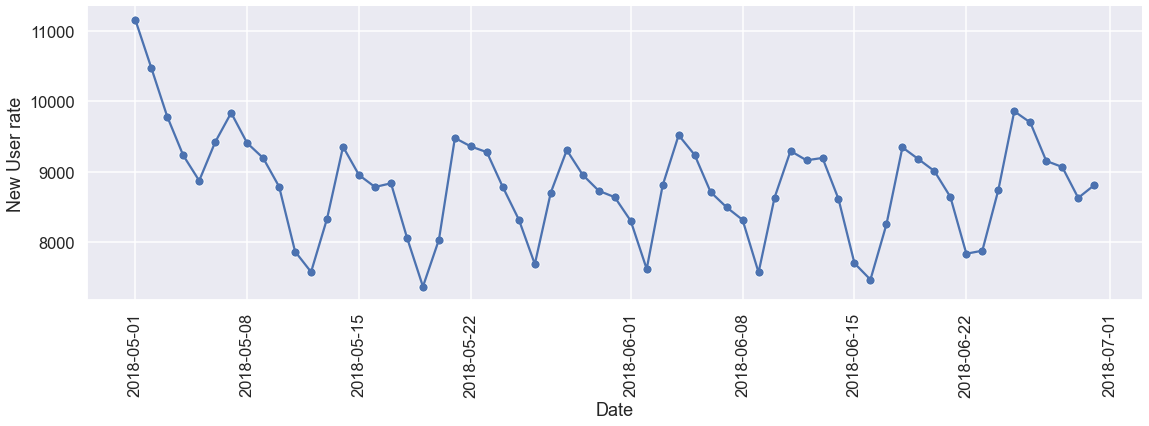

In [735]:
plt.figure(figsize=(5,15))
sns.set_theme('talk')
sns.relplot(x="Date",y="rate",data=new_user,kind='scatter',height=5,markers=True, aspect=17/5.27)
plt.xticks(rotation=90)
plt.ylabel("New User rate");

ax = sns.lineplot(x="Date", y="rate", data=new_user)
ax = sns.scatterplot(x="Date", y="rate",data=new_user,
                     legend=False)



<Figure size 360x1080 with 0 Axes>

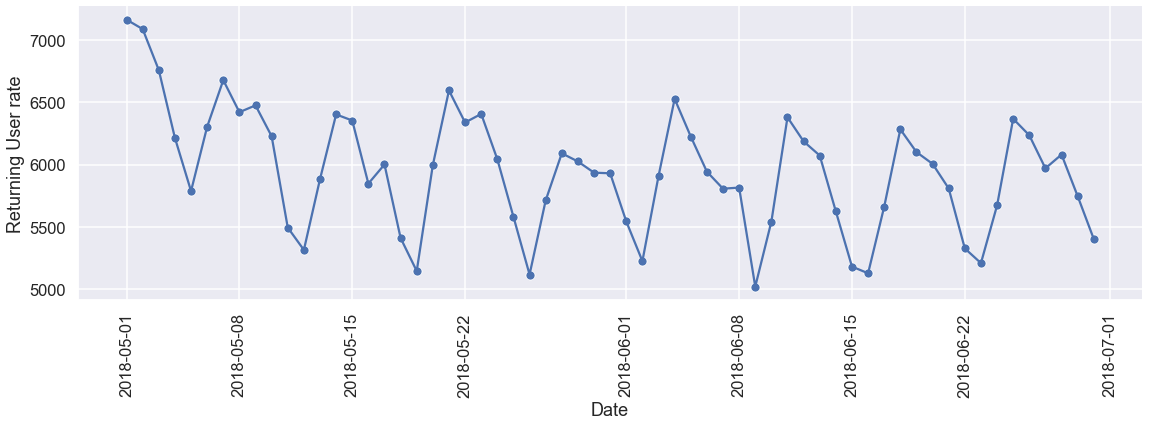

In [736]:
plt.figure(figsize=(5,15))
sns.set_theme('talk')
sns.relplot(x="Date",y="oldrate",data=new_user,kind='scatter',height=5,markers=True, aspect=17/5.27)
plt.xticks(rotation=90)
plt.ylabel("Returning User rate");

ax = sns.lineplot(x="Date", y="oldrate", data=new_user)
ax = sns.scatterplot(x="Date", y="oldrate",data=new_user,
                     legend=False);



In [737]:
#ädata.Date

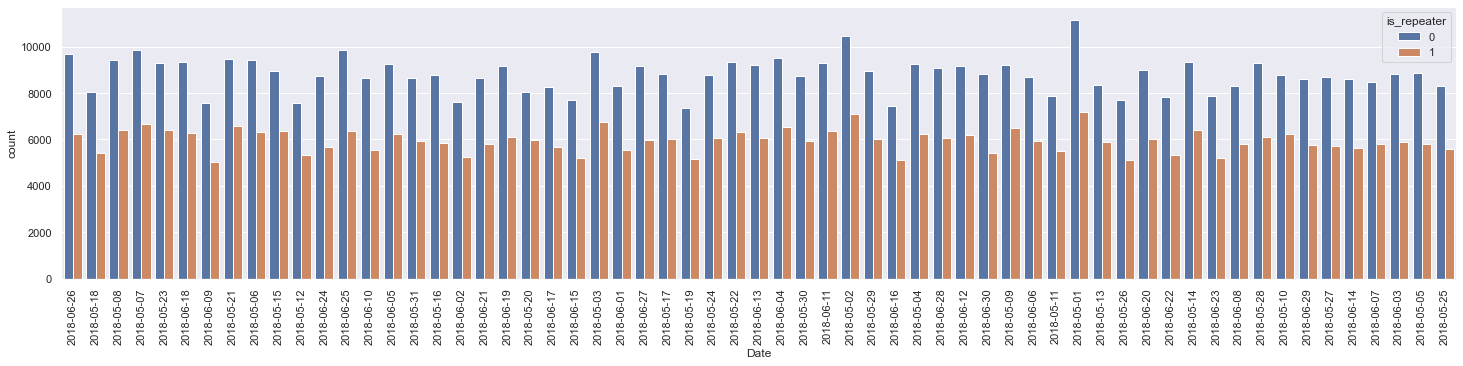

In [183]:
plt.figure(figsize=(25,5))
sns.countplot(x="Date",hue="is_repeater",data=data)
plt.xticks(rotation=90);


From the above plots, the trends in the new user and returning users are almost the same. The trends show the constant rise and loss in the number of users. Since both users have the same rise and high, it depends on the loss of users and the rise of users. The high number of users appeared to be at the start of the month, then started to decreases in a periodical manner. The number of new users seems to be high at the starting of the month compared to returning users.

In [428]:
data['date_only'] = data['Date'].dt.date

In [429]:
repeater=data.is_repeater.value_counts()

In [430]:
repeater

0    537261
1    362739
Name: is_repeater, dtype: int64

Text(0.5, 1.0, 'Propotion of New and Old User')

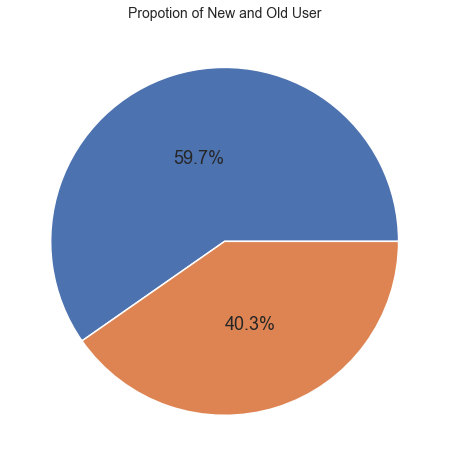

In [431]:
pie, ax = plt.subplots(figsize=[8,8])
#labels = repeater.keys
#labels = ["Old","New"]
plt.pie(x=repeater, autopct="%.1f%%", pctdistance=0.5)
plt.title("Propotion of New and Old User", fontsize=14)


The pie chart above displays, in total returning users, is higher than the old rate. This confirms that more users are satisfied with their previous visit and fulfilled their aim of the visit.

### Goal conversion rate

Conversion is the execution of a desired target action by a website visitor. So here the goal is 'Booking'.
Calculated the rate of Booking and analysed the trends in the rate over time.


In [297]:
data.head()

,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day,Date,year,Month,Booking
0,2.018060e+18,FA6JXA8TAJ,UK,0,1,2,United Kingdom,16,0,0,29,2111,0,\N,\N,2018-06-26,2018,June,0
1,2.018050e+18,0X7RLU6KF7,BR,0,0,2,Brazil,2,3,0,1485,2100,27,20180530,20180531,2018-05-18,2018,May,0
2,2.018050e+18,0I59VWLQW0,UK,0,0,2,United Kingdom,20,0,0,143,2100,0,\N,\N,2018-05-08,2018,May,0
3,2.018050e+18,JXNHOBQL50,CH,0,0,2,Switzerland,28,0,0,69,2100,0,\N,\N,2018-05-07,2018,May,0
4,2.018050e+18,W24I0V5Z2L,IT,0,0,2,Italy,20,6,0,887,2100,100,20180609,20180610,2018-05-23,2018,May,0


In [432]:
data['Booked']=pd.get_dummies(data["Booking"])[1]
data['Not_Booked']=pd.get_dummies(data["Booking"])[0]

In [433]:
conv_rate = data.groupby("Date").sum()

In [434]:
conv_rate['conv_rate'] = conv_rate['Booked']/(conv_rate['Booked'] + conv_rate['Not_Booked'])

<Figure size 360x1080 with 0 Axes>

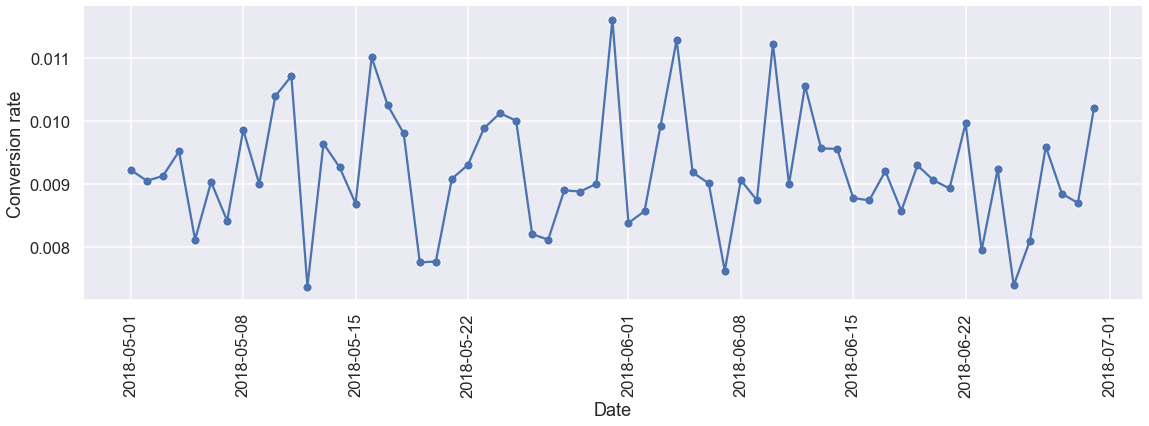

In [468]:
plt.figure(figsize=(5,15))
sns.set_theme('talk')
sns.relplot(x="Date",y="conv_rate",data=conv_rate,kind='scatter',height=5,markers=True, aspect=17/5.27)
plt.xticks(rotation=90)
plt.ylabel("Conversion rate");

ax = sns.lineplot(x="Date", y="conv_rate", data=conv_rate)
ax = sns.scatterplot(x="Date", y="conv_rate",data=conv_rate,
                     legend=False)

In [475]:
data['Booking'].value_counts()

Int64Index([0, 1], dtype='int64')

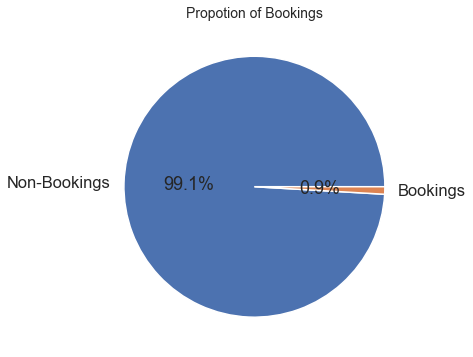

In [479]:
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Non-Bookings','Bookings']
plt.pie(x=data['Booking'].value_counts(), autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Propotion of Bookings", fontsize=14);

Most of the session does not result into bookings, only 0.9% of bookings are there. The rate over time is fluctuating with periodic high and low.

In [384]:
conv_rate.head()

,session_id,is_app,is_repeater,traffic_type,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,year,Booking,Booked,Not_Booked,conv_rate
Date,,,,,,,,,,,,,,,
2018-05-01,3.699489e+22,0,7167,99354,291784,14651,181,6811509,38821572,110003,36993976,169,169.0,18163.0,0.009219
2018-05-02,3.546117e+22,0,7091,93310,266046,13678,169,6375392,37212542,103655,35460296,159,159.0,17413.0,0.009048
2018-05-03,3.339066e+22,0,6761,86830,247290,13425,158,6344345,35032923,107434,33389828,151,151.0,16395.0,0.009126
2018-05-04,3.117484e+22,0,6215,80334,234336,12227,152,5680693,32726406,86889,31174064,147,147.0,15301.0,0.009516
2018-05-05,2.958259e+22,0,5787,80204,239798,11060,127,5154696,31030919,78661,29581862,119,119.0,14540.0,0.008118


In [436]:
#countries = ['United States','India','United Kingdom','Brazil','Turkey']
country_data = data[data['country_name'].isin(['United States','India','United Kingdom','Brazil','Turkey'])]
#conv_rate_count = data.groupby(['Date', 'country_name']).sum()

In [437]:
country_data.country_name.value_counts()

United States     106830
India              55392
United Kingdom     54767
Brazil             54764
Turkey             47519
Name: country_name, dtype: int64

In [438]:
conv_rate_count

session_id  is_app  is_repeater  traffic_type  \
Date       country_name                                                     
2018-05-01 Aland Islands  2.018050e+18       0            0             6   
           Albania        4.036100e+18       0            1             8   
           Algeria        3.228880e+19       0            6            88   
           Andorra        4.036100e+18       0            0            12   
           Angola         2.018050e+18       0            1             6   
...                                ...     ...          ...           ...   
2018-06-30 Venezuela      3.027090e+19       0            2            58   
           Vietnam        1.654809e+20       0           14           398   
           Zambia         2.018060e+18       0            0             2   
           Zimbabwe       2.018060e+18       0            0             6   
           \N             1.412642e+19       0            2            24   

                          agent_id  clickouts  bookings  session_duration  \
Date       country_name                                                     
2018-05-01 Aland Islands        12          1         0               515   
           Albania              24          0         0                30   
           Algeria             260          5         0              2434   
           Andorra              36          0         0                 6   
           Angola               20          0         0                53   
...                            ...        ...       ...               ...   
2018-06-30 Venezuela           166         12         1              4682   
           Vietnam            1290         29         0             11543   
           Zambia                4          0         0               176   
           Zimbabwe             20          2         0               614   
           \N                   88          4         0              1194   

                          entry_page  total_ctp    year  Booking  Booked  \
Date       country_name                                                    
2018-05-01 Aland Islands        2116          0    2018        0     0.0   
           Albania              4213          0    4036        0     0.0   
           Algeria             33788        130   32288        0     0.0   
           Andorra              4232          0    4036        0     0.0   
           Angola               2115          0    2018        0     0.0   
...                              ...        ...     ...      ...     ...   
2018-06-30 Venezuela           31838          3   30270        1     1.0   
           Vietnam            173412        121  165476        0     0.0   
           Zambia               2100          1    2018        0     0.0   
           Zimbabwe             2113         43    2018        0     0.0   
           \N                  14740          3   14126        0     0.0   

                          Not_Booked  
Date       country_name               
2018-05-01 Aland Islands         1.0  
           Albania               2.0  
           Algeria              16.0  
           Andorra               2.0  
           Angola                1.0  
...                              ...  
2018-06-30 Venezuela            14.0  
           Vietnam              82.0  
           Zambia                1.0  
           Zimbabwe              1.0  
           \N                    7.0  

[8439 rows x 14 columns]

In [440]:
gr=country_data.groupby(['country_name','Date']).sum()


In [442]:
gr['conv_rate'] = gr['Booked']/(gr['Booked'] + gr['Not_Booked'])

<Figure size 1080x1080 with 0 Axes>

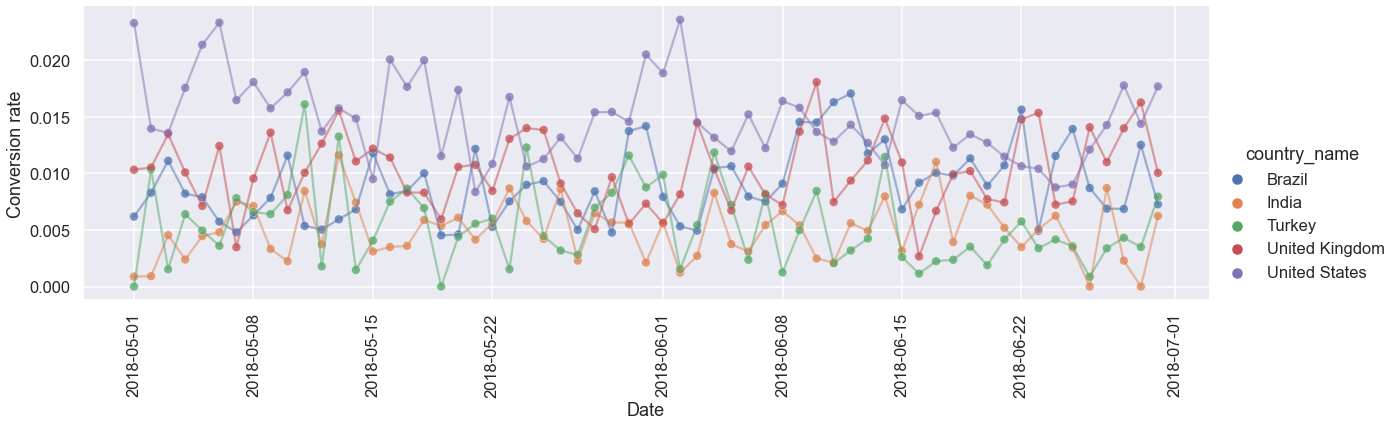

In [467]:
plt.figure(figsize=(15,15))
sns.set_theme('talk')
sns.relplot(x="Date",y="conv_rate",data=gr,hue='country_name',kind='scatter',height=5,markers=True, aspect=17/5,alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel("Conversion rate");

ax = sns.lineplot(x="Date", y="conv_rate",hue='country_name', data=gr,legend=False,alpha=0.5)
ax = sns.scatterplot(x="Date", y="conv_rate",data=gr,hue='country_name',
                     legend=False,alpha=0.5)
#ax = sns.lineplot(x="Date", y="is_repeater", hue="country_name",data=country_data)

Trends in conversion rate for the countries which has most number of bookings.

### Session Duration

Session duration shows how long visitors have stayed on average on an individual page. It is a good indicator of the quality of the traffic on a page and reflects how well the visitor's needs are met. 



<Figure size 360x1080 with 0 Axes>

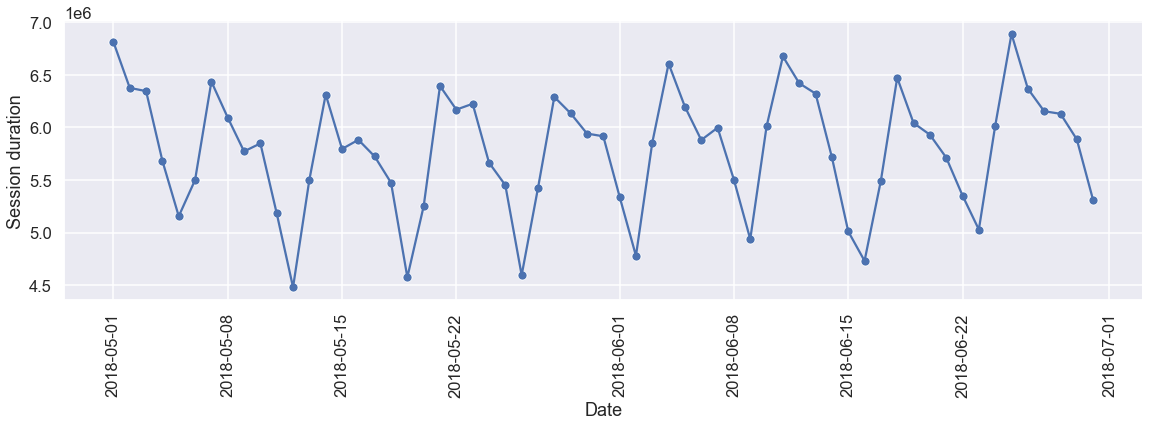

In [738]:
plt.figure(figsize=(5,15))
sns.set_theme('talk')
sns.relplot(x="Date",y="session_duration",data=conv_rate,kind='scatter',height=5,markers=True, aspect=17/5.27)
plt.xticks(rotation=90)
plt.ylabel("Session duration");

ax = sns.lineplot(x="Date", y="session_duration", data=conv_rate)
ax = sns.scatterplot(x="Date", y="session_duration",data=conv_rate,
                     legend=False)

In [739]:
average_session_duration = conv_rate['session_duration'].sum()/len(conv_rate['session_duration'])

In [740]:
average_session_duration

5788944.360655738

The session duration is periodic with time and the average session duration is 5788944 seconds.